In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

data = pd.read_csv("D:/Code/imdb_project/movie_metadata.csv")
data = data.dropna()
data.drop_duplicates(keep='first', inplace = True)
data["country"] = data["country"].replace({"USA": 1, "UK": 2})
data["country"] = data["country"].apply(lambda x: 0 if x != 1 and x != 2 else x)
data = data.drop(["color","director_name","actor_2_name", "genres", "actor_1_name","movie_title","content_rating","language",
                 "plot_keywords", "movie_imdb_link","actor_3_name","aspect_ratio"], axis = 1)
zcount = {}
for column in data.columns:
    zcount[column] = (Counter(sorted(data[column]))[0])
zcount.pop('country')
temp = []
for key in zcount.keys():
    if zcount[key] != 0:
        temp.append(key)
for col in temp:
    data[col] = data[col].replace({0.0:data[col].mean()})
len(data.columns)

16

In [ ]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [2]:
data["other_actor_facebook_likes"] = data["actor_3_facebook_likes"] + data["actor_2_facebook_likes"]
data["review_ratio"] = data["num_critic_for_reviews"] / data["num_user_for_reviews"]
data = data.drop(["cast_total_facebook_likes","actor_3_facebook_likes",
                  "actor_2_facebook_likes","num_critic_for_reviews","num_user_for_reviews"], axis = 1)
len(data.columns)

13

In [ ]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [5]:
data.columns
df = data[['title_year','country','duration', 'budget','gross',
          'review_ratio','num_voted_users','facenumber_in_poster','movie_facebook_likes',
          'director_facebook_likes','actor_1_facebook_likes','other_actor_facebook_likes',
          'imdb_score']]
len(df.columns)

13

In [12]:
feature = df.iloc[:,:len(df.columns)-1].values
rating = df["imdb_score"].values

scaler = MinMaxScaler()
X = scaler.fit_transform(feature)
y = rating
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 5)

In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.3426276045545813

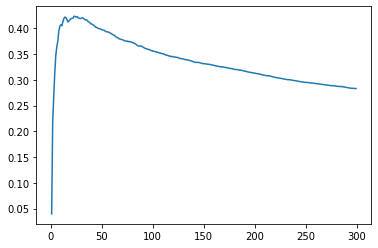

k = 22 with 0.42348390040840017


In [14]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,300):
    classifier = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    classifier.fit(x_train, y_train)
    score.append(classifier.score(x_test, y_test))
plt.plot(range(1,300),score)
plt.show()
print(f'k = {score.index(max(score))} with {max(score)}')

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

parameters = {"kernel":('linear', 'poly', 'rbf', 'sigmoid')}
regressor = SVR()
classifier = GridSearchCV(regressor, parameters)
classifier.fit(x_train, y_train)
regressor = SVR()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.4032141074795016

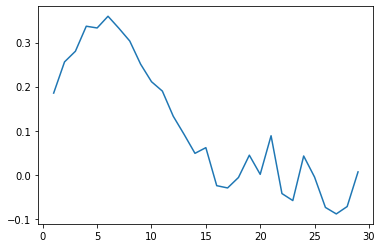

max_depth = 5 with 0.3599229708197256


In [20]:
from sklearn.tree import DecisionTreeRegressor
n = 30
score = []
for i in range(1,n):
    regressor = DecisionTreeRegressor(criterion='mae', max_depth = i)
    regressor.fit(x_train, y_train)
    score.append(regressor.score(x_test, y_test))
plt.plot(range(1,n),score)
plt.show()
print(f'max_depth = {score.index(max(score))} with {max(score)}')

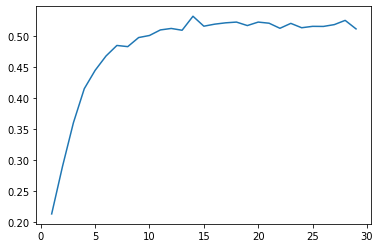

max_depth = 13 with 0.5320856482299967


In [21]:
from sklearn.ensemble import RandomForestRegressor
n = 30
score = []
for i in range(1,n):
    regressor = RandomForestRegressor(max_depth = i)    
    regressor.fit(x_train, y_train)
    score.append(regressor.score(x_test, y_test))
    
plt.plot(range(1,n),score)
plt.show()
print(f'max_depth = {score.index(max(score))} with {max(score)}')